In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable,birthrate,deathrate
0,0.0,0.883468,0.949292,0.023739,0.000000,0.466767,0.414029,0.300443,0.2
1,0.0,0.656127,0.716262,0.259141,0.610095,0.466767,0.414029,0.300443,0.2
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,0.414029,0.300443,0.2
3,0.0,0.221791,0.344182,0.388712,0.907468,0.466767,0.335106,0.300443,0.2
4,0.0,0.243748,0.408165,0.669156,1.000000,0.466767,0.414029,0.300443,0.2
5,0.0,0.784492,0.998309,0.123009,0.000000,0.466767,0.414029,0.300443,0.2
6,0.0,0.068557,0.294178,0.407796,0.844982,0.466767,0.214318,0.300443,0.2
7,0.0,0.240608,0.404058,0.478170,0.653472,0.466767,0.414029,0.300443,0.2
8,0.0,0.909896,1.000000,0.483670,0.610095,0.466767,0.414029,0.300443,0.2
9,0.0,0.636643,0.718951,0.213241,0.610095,0.466767,0.414029,0.300443,0.2


In [3]:
X = dataset.iloc[:, [0,*range(2,9)]].values
Y = dataset['population'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 8


first_hidden_layer_size = 25
second_hidden_layer_size = 8

output_layer_size = 1


epochs_number = 100
batch_size = 32

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                225       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 208       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 46 samples
Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 0.6096 - mean_absolute_error: 0.7351 - mean_squared_error: 0.6096 - val_loss: 0.5040 - val_mean_absolute_error: 0.6601 - val_mean_squared_error: 0.5040
Epoch 2/100
181/181 [==============================] - 0s 294us/step - loss: 0.5259 - mean_absolute_error: 0.6780 - mean_squared_error: 0.5259 - val_loss: 0.4358 - val_mean_absolute_error: 0.6059 - val_mean_squared_error: 0.4358
Epoch 3/100
181/181 [==============================] - 0s 160us/step - loss: 0.4627 - mean_absolute_error: 0.6287 - mean_squared_error: 0.4627 - val_loss: 0.3938 - val_mean_absolute_error: 0.5695 - val_mean_squared_error: 0.3938
Epoch 4/100
181/181 [==============================] - 0s 329us/step - loss: 0.4163 - mean_absolute_error: 0.5929 - mean_squared_error: 0.4163 - val_loss: 0.3661 - val_mean_absolute_error: 0.5457 - val_mean_squared_error: 0.3661
Epoch 5/100
181/181 [====================

181/181 [==============================] - 0s 283us/step - loss: 0.0232 - mean_absolute_error: 0.1223 - mean_squared_error: 0.0232 - val_loss: 0.0247 - val_mean_absolute_error: 0.1118 - val_mean_squared_error: 0.0247
Epoch 37/100
181/181 [==============================] - 0s 90us/step - loss: 0.0228 - mean_absolute_error: 0.1212 - mean_squared_error: 0.0228 - val_loss: 0.0239 - val_mean_absolute_error: 0.1098 - val_mean_squared_error: 0.0239
Epoch 38/100
181/181 [==============================] - 0s 105us/step - loss: 0.0225 - mean_absolute_error: 0.1200 - mean_squared_error: 0.0225 - val_loss: 0.0237 - val_mean_absolute_error: 0.1096 - val_mean_squared_error: 0.0237
Epoch 39/100
181/181 [==============================] - 0s 351us/step - loss: 0.0223 - mean_absolute_error: 0.1197 - mean_squared_error: 0.0223 - val_loss: 0.0240 - val_mean_absolute_error: 0.1103 - val_mean_squared_error: 0.0240
Epoch 40/100
181/181 [==============================] - 0s 98us/step - loss: 0.0221 - mean_abs

Epoch 72/100
181/181 [==============================] - 0s 73us/step - loss: 0.0182 - mean_absolute_error: 0.1069 - mean_squared_error: 0.0182 - val_loss: 0.0187 - val_mean_absolute_error: 0.1008 - val_mean_squared_error: 0.0187
Epoch 73/100
181/181 [==============================] - 0s 80us/step - loss: 0.0181 - mean_absolute_error: 0.1069 - mean_squared_error: 0.0181 - val_loss: 0.0186 - val_mean_absolute_error: 0.1006 - val_mean_squared_error: 0.0186
Epoch 74/100
181/181 [==============================] - 0s 307us/step - loss: 0.0180 - mean_absolute_error: 0.1067 - mean_squared_error: 0.0180 - val_loss: 0.0184 - val_mean_absolute_error: 0.1002 - val_mean_squared_error: 0.0184
Epoch 75/100
181/181 [==============================] - 0s 76us/step - loss: 0.0180 - mean_absolute_error: 0.1064 - mean_squared_error: 0.0180 - val_loss: 0.0182 - val_mean_absolute_error: 0.0993 - val_mean_squared_error: 0.0182
Epoch 76/100
181/181 [==============================] - 0s 76us/step - loss: 0.0179

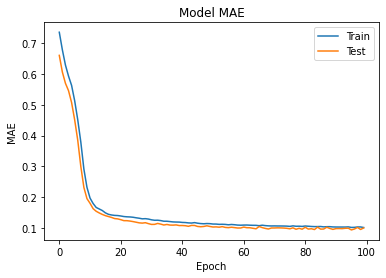

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

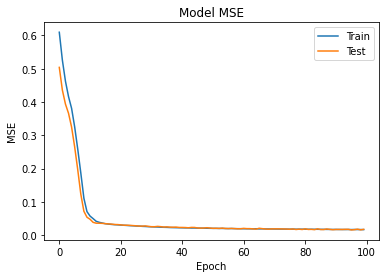

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

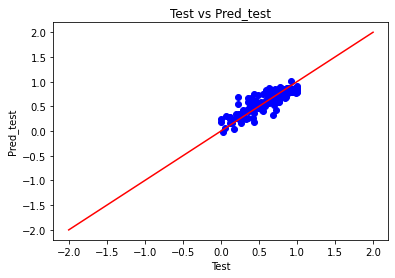

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

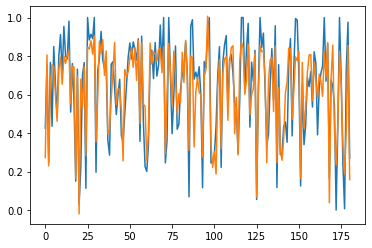

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

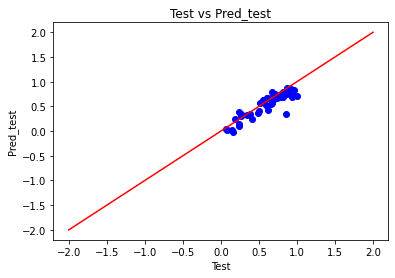

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

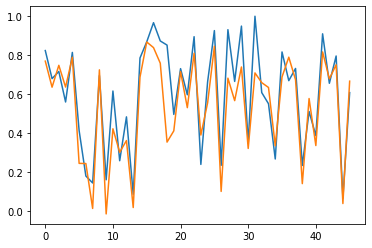

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.12816979439033646
0.13154707928053117


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9827403426170349, p = 0.024607764557003975
Test k = 0.9354743957519531, p = 0.013312824070453644


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9830448031425476, p_s = 0.008088644593954086
k_n = 9.514664729368887, p_n = 0.00858848982437485


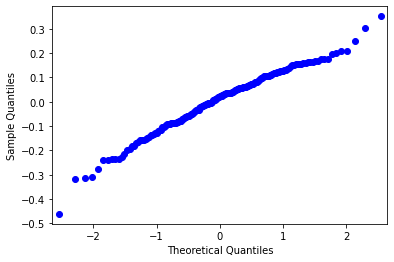

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

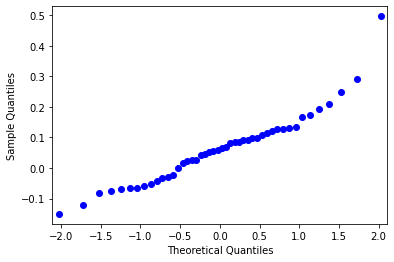

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

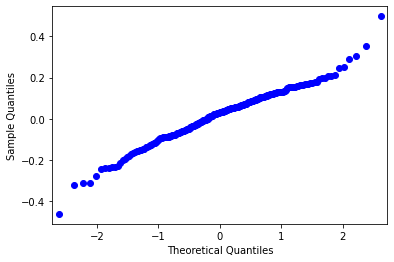

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

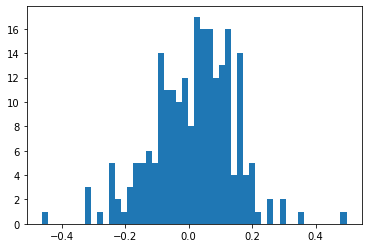

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')